In [60]:
# pip install nbconvert --upgrade
# jupyter nbconvert --to html propensity classification.ipynb
!jupyter nbconvert --to html "your_notebook.ipynb"




This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('Credit_card.csv')

In [5]:
df.head()

,MobileNumber,BounceRate,Clicks,TimeSpentOnSite,CIBILScore,RiskScore,HouseOwnership,AverageIncome,CreditCardPurchase
0,1000000000,0.374540,100.000000,170.073266,686,0.220700,Rented,9.113222e+05,Yes
1,1000000001,0.950714,100.000000,180.000000,711,0.614642,Owned,1.897275e+06,Yes
2,1000000002,0.731994,70.440363,107.001900,669,0.870359,Owned,6.282927e+05,No
3,1000000003,0.598658,43.800526,91.669168,652,0.696153,Rented,1.897275e+06,Yes
4,1000000004,0.156019,100.000000,158.279043,635,0.244759,Rented,9.365364e+05,No


In [7]:
df=df[['BounceRate','Clicks','TimeSpentOnSite','CIBILScore','RiskScore','HouseOwnership','AverageIncome','CreditCardPurchase']]
df.head(2)

,BounceRate,Clicks,TimeSpentOnSite,CIBILScore,RiskScore,HouseOwnership,AverageIncome,CreditCardPurchase
0,0.374540,100.0,170.073266,686,0.220700,Rented,9.113222e+05,Yes
1,0.950714,100.0,180.000000,711,0.614642,Owned,1.897275e+06,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BounceRate          5000 non-null   float64
 1   Clicks              5000 non-null   float64
 2   TimeSpentOnSite     5000 non-null   float64
 3   CIBILScore          5000 non-null   int64  
 4   RiskScore           5000 non-null   float64
 5   HouseOwnership      4510 non-null   object 
 6   AverageIncome       5000 non-null   float64
 7   CreditCardPurchase  5000 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [11]:
df.describe()

,BounceRate,Clicks,TimeSpentOnSite,CIBILScore,RiskScore,AverageIncome
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5.000000e+03
mean,0.496832,87.446555,150.152854,572.17380,0.494349,1.183309e+06
std,0.289634,21.390521,38.033556,157.76554,0.287741,5.478512e+05
min,0.000012,15.576132,22.655295,300.00000,0.000009,2.000000e+05
25%,0.243863,83.248364,127.325741,436.75000,0.244818,7.179253e+05
50%,0.500009,100.000000,171.941248,568.00000,0.492797,1.220316e+06
75%,0.748101,100.000000,180.000000,708.00000,0.741130,1.659046e+06
max,0.999718,100.000000,180.000000,849.00000,0.999695,2.202229e+06


In [13]:
missing_values=df.isnull().sum()
missing_values

BounceRate              0
Clicks                  0
TimeSpentOnSite         0
CIBILScore              0
RiskScore               0
HouseOwnership        490
AverageIncome           0
CreditCardPurchase      0
dtype: int64

## Visualize the distribution of the CreditCardPurchase column
plt.figure(figsize=(4, 3))
sns.countplot(x='CreditCardPurchase', data=df)
plt.title('Distribution of CreditCardPurchase')
plt.show()

In [18]:
#Encode categorical columns

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['CreditCardPurchase'] = label_encoder.fit_transform(df['CreditCardPurchase'])
df['HouseOwnership'] = label_encoder.fit_transform(df['HouseOwnership'])


In [20]:
df.head(2)

,BounceRate,Clicks,TimeSpentOnSite,CIBILScore,RiskScore,HouseOwnership,AverageIncome,CreditCardPurchase
0,0.374540,100.0,170.073266,686,0.220700,1,9.113222e+05,1
1,0.950714,100.0,180.000000,711,0.614642,0,1.897275e+06,1


In [22]:
#imputing missing values using knn imputer

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])



In [23]:
df.isnull().sum()

BounceRate            0
Clicks                0
TimeSpentOnSite       0
CIBILScore            0
RiskScore             0
HouseOwnership        0
AverageIncome         0
CreditCardPurchase    0
dtype: int64

In [25]:

# Step 11: standarize Data using RobustScaler mean=0 standard deviation=1
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

# Normalize the numerical columns using RobustScaler
df[numerical_columns] = robust_scaler.fit_transform(df[numerical_columns])

In [27]:
df[numerical_columns]

,BounceRate,Clicks,TimeSpentOnSite,CIBILScore,RiskScore,AverageIncome
0,-0.248828,0.000000,-0.035463,0.435023,-0.548237,-0.328326
1,0.893835,0.000000,0.152992,0.527189,0.245501,0.719311
2,0.460071,-1.764582,-1.232848,0.372350,0.760734,-0.629062
3,0.195641,-3.354865,-1.523934,0.309677,0.409734,0.719311
4,-0.682198,0.000000,-0.259372,0.247005,-0.499762,-0.301534
...,...,...,...,...,...,...
4995,0.788097,0.000000,0.152992,-0.670968,0.826096,-0.367348
4996,-0.754857,-2.197042,0.152992,-0.040553,-0.459952,-0.625624
4997,-0.341438,0.000000,-1.490141,-0.309677,-0.649175,0.028897
4998,0.626166,-4.717170,0.044010,-0.538249,0.194351,-0.773020


In [24]:
# indepent and dependent feaatures
X = df.drop('CreditCardPurchase', axis=1)
y = df['CreditCardPurchase']

In [26]:
#Over Sampling to balance our output feature
from imblearn.over_sampling import RandomOverSampler
over_model = RandomOverSampler(random_state=0)
X_over , y_over = over_model.fit_resample(X,y)
print(X_over.shape)
print(y_over.shape)
print(y_over.value_counts())
X = pd.DataFrame(X_over)
y = y_over

(7516, 7)
(7516,)
CreditCardPurchase
1.0    3758
0.0    3758
Name: count, dtype: int64


In [28]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print("Dataset Split sucessfully sucessufully into train and test!!")

Dataset Split sucessfully sucessufully into train and test!!


In [35]:
print("X_train :- ",X_train.shape)
print("X_test :- ",X_test.shape)
print("y_train :- ",y_train.shape)
print("y_test :- ",y_test.shape)

X_train :-  (6012, 7)
X_test :-  (1504, 7)
y_train :-  (6012,)
y_test :-  (1504,)


In [37]:
#Empty df for result
col = ["Algorithm","Accuracy","Error rate","Precision","Recall","F1 score"]
result_df = pd.DataFrame(columns = col)

In [39]:
#Model_Eval Function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def model_Eval(algo_name,y_test,y_pred):

    acc=100*(accuracy_score(y_test,y_pred))
    er=(1-accuracy_score(y_test,y_pred))*100
    pre=precision_score(y_test,y_pred,average='weighted')*100
    re=recall_score(y_test,y_pred,average='weighted')*100
    f1=f1_score(y_test,y_pred,average='weighted')*100

    print("Accuracy of {0} :-> {1:.2f} ".format(algo_name,acc))
    print("Error rate of {0}:-> {1:.2f} ".format(algo_name,er))
    print("Precision of {0}:-> {1:.2f} ".format(algo_name,pre))
    print("Recall of {0}:-> {1:.2f}".format(algo_name,re))
    print("F1 score of {0} :-> {1:.2f}".format(algo_name,f1))

    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm=confusion_matrix(y_test,y_pred)
    tn=cm[0][0]
    fp=cm[0][1]
    fn=cm[1][0]
    tp=cm[1][1]
    plt.figure(figsize=(5,4))
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt=".1f")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")

    result_df.loc[len(result_df)] = [algo_name,acc,er,pre,re,f1]

Model Created !!!
Model Traning Completed
KNN model train sucessfully in :  0.0 Minutes 0 Seconds
Accuracy of K-Nearest Neighbor Algorithm :-> 71.21 
Error rate of K-Nearest Neighbor Algorithm:-> 28.79 
Precision of K-Nearest Neighbor Algorithm:-> 72.67 
Recall of K-Nearest Neighbor Algorithm:-> 71.21
F1 score of K-Nearest Neighbor Algorithm :-> 70.74
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       752
           1       0.67      0.84      0.74       752

    accuracy                           0.71      1504
   macro avg       0.73      0.71      0.71      1504
weighted avg       0.73      0.71      0.71      1504



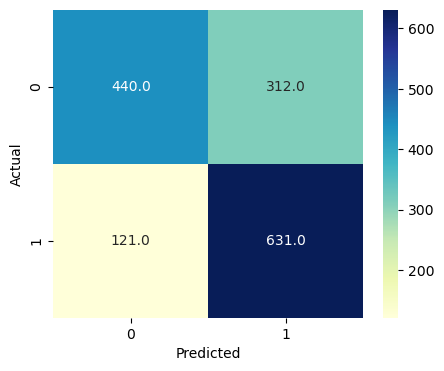

In [41]:
# #Create A model K = 3 , distance = manhattan_distance
from sklearn.neighbors import KNeighborsClassifier
import time
KNN_model = KNeighborsClassifier(n_neighbors=3,p=1)
print("Model Created !!!")

start_training = time.time()

#model traning
KNN_model.fit(X_train,y_train)
print("Model Traning Completed")

end_training = time.time()
total_training_time = end_training-start_training
print("KNN model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")

y_pred=KNN_model.predict(X_test)

#model Evaluation
model_Eval('K-Nearest Neighbor Algorithm',y_test,y_pred)


Model Created !!!
Model Traning Completed
Logistic Regression model train sucessfully in :  0.0 Minutes 0 Seconds
Accuracy of Logistic Regression Algorithm :-> 51.40 
Error rate of Logistic Regression Algorithm:-> 48.60 
Precision of Logistic Regression Algorithm:-> 51.41 
Recall of Logistic Regression Algorithm:-> 51.40
F1 score of Logistic Regression Algorithm :-> 51.28
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       752
           1       0.51      0.56      0.54       752

    accuracy                           0.51      1504
   macro avg       0.51      0.51      0.51      1504
weighted avg       0.51      0.51      0.51      1504



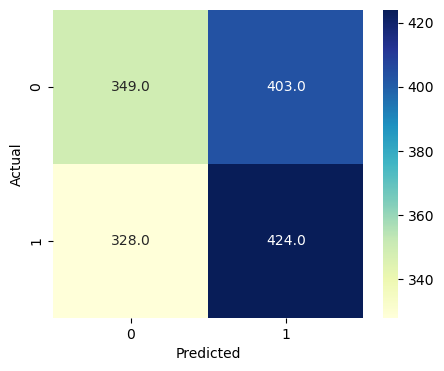

In [43]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LR_Model=LogisticRegression()
print("Model Created !!!")

start_training = time.time()


#model traning
LR_Model.fit(X_train,y_train)
print("Model Traning Completed")

end_training = time.time()
total_training_time = end_training-start_training
print("Logistic Regression model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")

#find t y_pred
y_pred=LR_Model.predict(X_test)

# LR Eval
model_Eval('Logistic Regression Algorithm',y_test,y_pred)


Model Created !!!
Model Traning Completed
GaussianNB model train sucessfully in :  0.0 Minutes 0 Seconds
Accuracy of GaussianNB Algorithm :-> 52.13 
Error rate of GaussianNB Algorithm:-> 47.87 
Precision of GaussianNB Algorithm:-> 52.24 
Recall of GaussianNB Algorithm:-> 52.13
F1 score of GaussianNB Algorithm :-> 51.51
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       752
           1       0.52      0.63      0.57       752

    accuracy                           0.52      1504
   macro avg       0.52      0.52      0.52      1504
weighted avg       0.52      0.52      0.52      1504



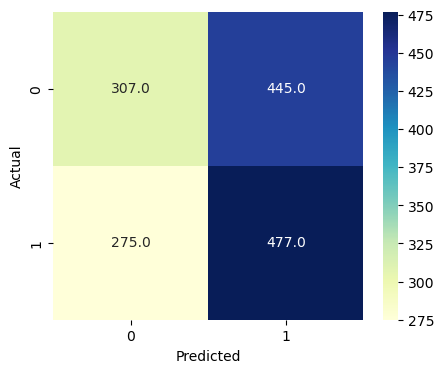

In [45]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB

GB_Model=GaussianNB()
print("Model Created !!!")

start_training = time.time()

#model traning
GB_Model.fit(X_train,y_train)
print("Model Traning Completed")

end_training = time.time()
total_training_time = end_training-start_training
print("GaussianNB model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")

y_pred=GB_Model.predict(X_test)

# Eval
model_Eval("GaussianNB Algorithm",y_test,y_pred)


Model Created !!!
Model Traning Completed
RandomForestClassifier model train sucessfully in :  0.0 Minutes 2 Seconds
Accuracy of Random Forest Algorithm :-> 92.35 
Error rate of Random Forest Algorithm:-> 7.65 
Precision of Random Forest Algorithm:-> 92.36 
Recall of Random Forest Algorithm:-> 92.35
F1 score of Random Forest Algorithm :-> 92.35
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       752
           1       0.92      0.93      0.92       752

    accuracy                           0.92      1504
   macro avg       0.92      0.92      0.92      1504
weighted avg       0.92      0.92      0.92      1504



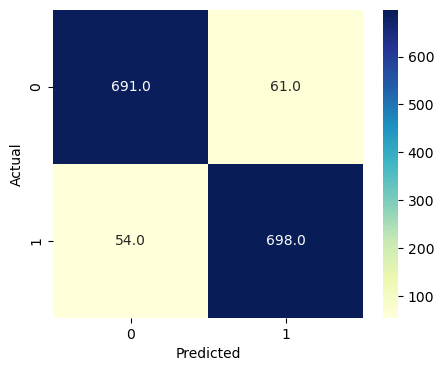

In [47]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# model creation
RFC_Model=RandomForestClassifier()
print("Model Created !!!")

start_training = time.time()
#model traning
RFC_Model.fit(X_train,y_train)
print("Model Traning Completed")

end_training = time.time()
total_training_time = end_training-start_training
print("RandomForestClassifier model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")

y_pred=RFC_Model.predict(X_test)

# model evaluation
model_Eval('Random Forest Algorithm',y_test,y_pred)


Model Created !!!


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:40:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Traning Completed
XGboost model train sucessfully in :  0.0 Minutes 0 Seconds
Accuracy of XGBoost Algorithm :-> 81.65 
Error rate of XGBoost Algorithm:-> 18.35 
Precision of XGBoost Algorithm:-> 82.32 
Recall of XGBoost Algorithm:-> 81.65
F1 score of XGBoost Algorithm :-> 81.55
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       752
           1       0.78      0.89      0.83       752

    accuracy                           0.82      1504
   macro avg       0.82      0.82      0.82      1504
weighted avg       0.82      0.82      0.82      1504



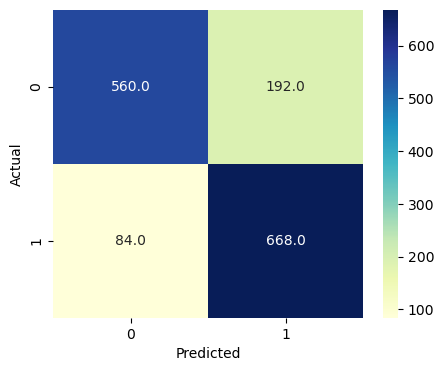

In [48]:
#XGB
import xgboost as xgb

# model creation
XGB_Model= xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
print("Model Created !!!")

start_training = time.time()
#model traning
XGB_Model.fit(X_train,y_train)
print("Model Traning Completed")

end_training = time.time()
total_training_time = end_training-start_training
print("XGboost model train sucessfully in : ",total_training_time//60, "Minutes", round(total_training_time%60),"Seconds")

y_pred=XGB_Model.predict(X_test)

# model evaluation
model_Eval('XGBoost Algorithm',y_test,y_pred)

